<a href="https://colab.research.google.com/github/BlueKuzo/startup/blob/main/week_3_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/mini_labs/week_3_correlation.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BYU CS 473 — Correlation, Causation, and Simpson’s Paradox

In this assignment, you will learn to distinguish between correlation, causation, and independence, and explore the concept of **Simpson’s Paradox**.

---

## Learning Goals
- Understand the difference between correlation and causation  
- Understand why correlation does not imply independence  
- Understand why correlation ≠ causation  
- Recognize and explain Simpson’s Paradox  

## 1. Correlation

Correlation measures the strength and direction of a linear relationship between two variables.  

- Positive correlation → as one variable increases, the other tends to increase.  
- Negative correlation → as one increases, the other tends to decrease.  
- Zero correlation → no linear relationship.  

We use **Pearson’s correlation coefficient**:  
$r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$


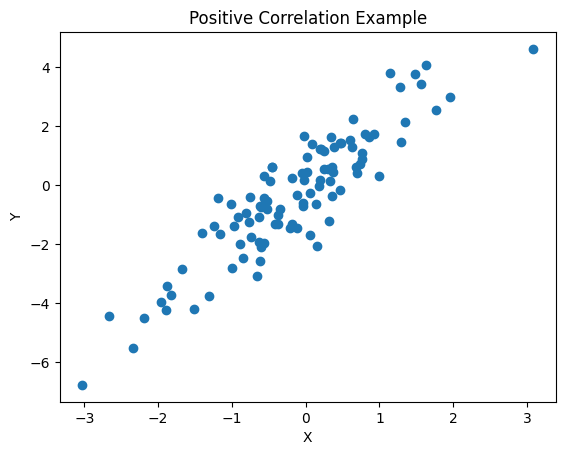

np.float64(0.905666645905928)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example: positively correlated variables
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 1, 100)

plt.scatter(x, y)
plt.title("Positive Correlation Example")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

np.corrcoef(x, y)[0, 1]


### Exercise 1
Generate two negatively correlated variables and compute their correlation coefficient.  
Plot them with a scatterplot.


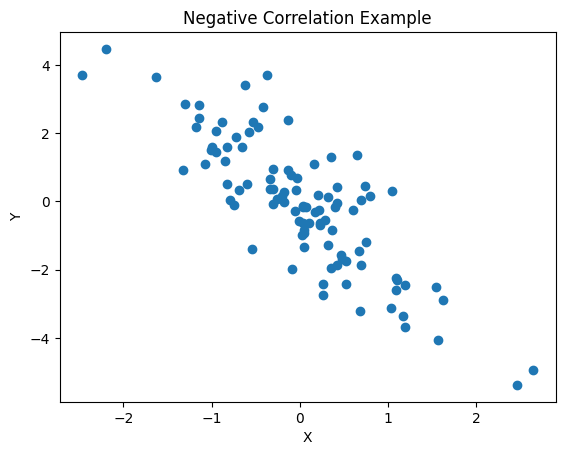

np.float64(-0.8331275669221893)

In [ ]:
x = np.random.normal(0, 1, 100)
y = -2 * x + np.random.normal(0, 1, 100)

plt.scatter(x, y)
plt.title("Negative Correlation Example")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

np.corrcoef(x, y)[0, 1]

## 2. Correlation ≠ Independence

Two variables can be **uncorrelated** but still **dependent**.  

Example: Let  
$X \sim N(0,1), \quad Y = X^2$

- Correlation between X and Y = 0 (no linear relationship).  
- But Y is completely determined by X (they are dependent).


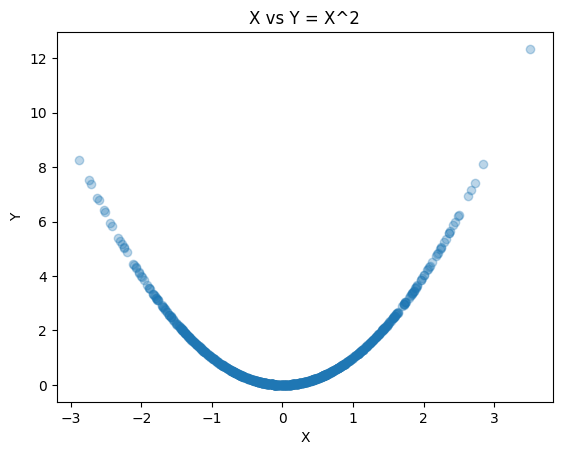

np.float64(0.07148089610001274)

In [ ]:
x = np.random.normal(0, 1, 1000)
y = x**2

plt.scatter(x, y, alpha=0.3)
plt.title("X vs Y = X^2")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

np.corrcoef(x, y)[0, 1]


### Exercise 2
Try another example: define `Y = cos(X)` for `X` sampled uniformly from [-π, π].  
- Plot `X` vs `Y`.  
- Compute the correlation coefficient.  
- Are X and Y independent? Why or why not?


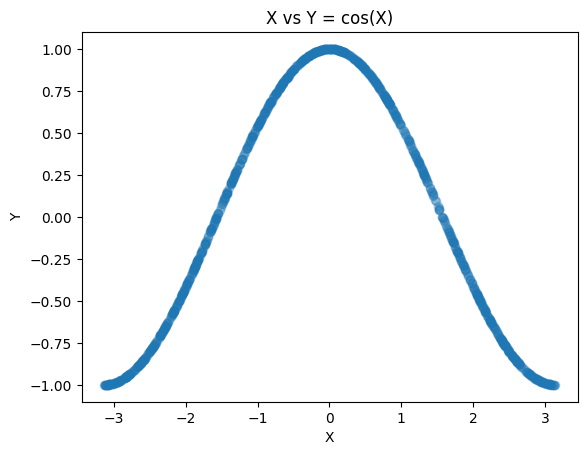

np.float64(0.03077793363438868)

In [ ]:
x = np.random.uniform(-np.pi, np.pi, 1000)
y = np.cos(x)

plt.scatter(x, y, alpha=0.3)
plt.title("X vs Y = cos(X)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

np.corrcoef(x, y)[0, 1]

When Y = cos(x), Y is determined by x, so it is not independent.

## 3. Simpson’s Paradox

Simpson’s Paradox occurs when a trend appears in different groups of data but reverses when the groups are combined.

Example: University admissions data:  

- Group A (Men vs Women): higher female admit rate  
- Group B (Men vs Women): higher female admit rate  
- Combined: women appear to have lower admit rate  


In [ ]:
import pandas as pd

# Simulated data
data = pd.DataFrame({
    "Department": ["A"]*100 + ["B"]*100,
    "Gender": ["M"]*80 + ["F"]*20 + ["M"]*20 + ["F"]*80,
    "Admitted": [1]*60 + [0]*20 + [1]*15 + [0]*5 + [1]*10 + [0]*10 + [1]*40 + [0]*40
})

# Grouped admit rates
print(data.groupby(["Department", "Gender"])["Admitted"].mean())
print("\nOverall rates:")
print(data.groupby("Gender")["Admitted"].mean())


Department  Gender
A           F         0.75
            M         0.75
B           F         0.50
            M         0.50
Name: Admitted, dtype: float64

Overall rates:
Gender
F    0.55
M    0.70
Name: Admitted, dtype: float64


### Exercise 3
1. Interpret the paradox in the example above.  
2. Why does the paradox occur?  
3. Provide one real-world situation where Simpson’s Paradox could mislead decision-making.


1. Men and women have equal admission rates within each department, but in the overall rates, men have a higher admission rate.
2. Department A has a high admit rate and mostly men applied, while Department B has a lower admit rate and mostly women applied.
3. The classic example for Simpson's Paradox is the graduate admissions at UC Berkeley in 1973.